<a href="https://colab.research.google.com/github/benjamin-dinh/imbd_webscraper/blob/main/imdb_webscraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraper for Top IMDb Movies**

---



In [ ]:
import requests
from IPython.core.display import HTML

In [ ]:
import numpy as np
import pandas as pd

import requests
from bs4 import BeautifulSoup
from IPython.display import HTML
url1 = "https://www.imdb.com/list/ls068082370/"
url2 = "https://www.imdb.com/list/ls068082370/?sort=list_order,asc&st_dt=&mode=detail&page=2"
url3 = "https://www.imdb.com/list/ls068082370/?sort=list_order,asc&st_dt=&mode=detail&page=3"

In [ ]:
headers = {'Accept-Language':'en-US,en'}
page1 = requests.get(url1, headers=headers)
page2 = requests.get(url2, headers=headers)
page3 = requests.get(url3, headers=headers)

In [ ]:
soup1 = BeautifulSoup(page1.content, 'html.parser')
soup2 = BeautifulSoup(page2.content, 'html.parser')
soup3 = BeautifulSoup(page3.content, 'html.parser')
movies1 = soup1.select('div.lister-item.mode-detail')
movies2 = soup2.select('div.lister-item.mode-detail')
movies3 = soup3.select('div.lister-item.mode-detail')

In [ ]:
def get_movie_title(movie_node):
    movie_node = movie_node.select_one('h3 a')
    if not movie_node:
        return None
    return movie_node.text[:]

In [ ]:
def get_movie_year(movie_node):
    movie_node = movie_node.select_one('span.lister-item-year')
    if not movie_node:
        return None
    return movie_node.text[1:-1]

In [ ]:
def get_movie_rating(movie_node):
    movie_node = movie_node.select_one('span.ipl-rating-star__rating')
    if not movie_node:
        return None
    return movie_node.text[:]

In [ ]:
def get_movie_genre(movie_node):
    movie_node = movie_node.select_one('span.genre')
    if not movie_node:
        return None
    movie_node = movie_node.text.strip()
    return movie_node.split(',')[0]

In [ ]:
def get_movie_director(movie_node):
    movie_node = movie_node.select_one('p.text-muted.text-small a')
    if not movie_node:
        return None
    return movie_node.text[:]

In [ ]:
def get_movie_votes(movie_node):
    movie_node = movie_node.find('span', {'name':'nv'})
    if not movie_node:
        return None
    return int(movie_node.text[:].replace(',',''))

In [ ]:
def append_movie_info(movies):
  for movie_node in movies:
      movie_info.append(dict(
          title=get_movie_title(movie_node),
          year=get_movie_year(movie_node),
          rating=get_movie_rating(movie_node),
          genre=get_movie_genre(movie_node),
          director=get_movie_director(movie_node),
          numberOfVotes=get_movie_votes(movie_node)
      ))

In [ ]:
movie_info=[]
append_movie_info(movies1)
append_movie_info(movies2)
append_movie_info(movies3)
# movie_info
df_movies = pd.DataFrame(movie_info)
# df_movies.info()

### *Analysis*

In [ ]:
maxVote = df_movies.numberOfVotes.max()
minVote = df_movies.numberOfVotes.min()
print("The movie with the most votes is " + df_movies['title'][df_movies['numberOfVotes'] == maxVote].values[0])
print("The movie with the least votes is " + df_movies['title'][df_movies['numberOfVotes'] == minVote].values[0])

The movie with the most votes is The Shawshank Redemption
The movie with the least votes is Zulu


The genre with the most movies is Drama


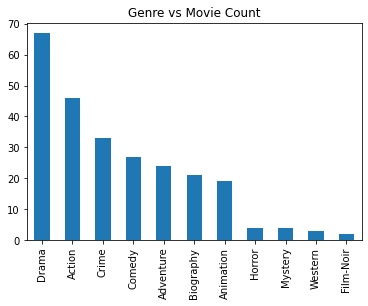

In [ ]:
genre_counts = df_movies.genre.value_counts()
genre_counts.plot(kind='bar', title ='Genre vs Movie Count')
print('The genre with the most movies is '+ genre_counts.keys()[0])

In [ ]:
director_counts = df_movies.director.value_counts()
print('The top five directors with the most number of movies are: ')
for x in range(5):
  print(director_counts.keys()[x])

The top five directors with the most number of movies are: 
Christopher Nolan
Stanley Kubrick
Steven Spielberg
Martin Scorsese
Alfred Hitchcock
